In [5]:
import numpy as np
import matplotlib as plt

data = np.array([[40,20],
                 [55,30],
                 [70,60],
                 [50,35],
                 [45,40],
                 [62,75],
                 [45,30],
                 [68,80],
                 [80,70],
                 [75,90]])

plt.scatter(data[:,0],data[:,1])
plt.xlabel("Maths marks")
plt.ylabel("Science Marks")
plt.show()

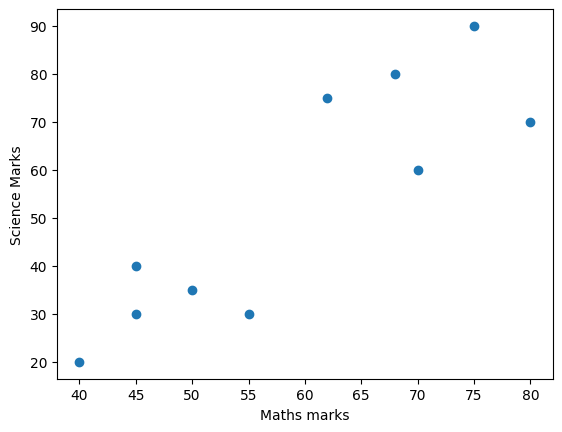

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[40,20],
                 [55,30],
                 [70,60],
                 [50,35],
                 [45,40],
                 [62,75],
                 [45,30],
                 [68,80],
                 [80,70],
                 [75,90]])

plt.scatter(data[:,0], data[:,1])
plt.xlabel("Maths marks")
plt.ylabel("Science Marks")
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data)
print(scaled_data)

[[-1.43299332 -1.39951173]
 [-0.3016828  -0.97541727]
 [ 0.82962771  0.29686613]
 [-0.67878631 -0.76337004]
 [-1.05588981 -0.5513228 ]
 [ 0.2262621   0.93300782]
 [-1.05588981 -0.97541727]
 [ 0.67878631  1.14505506]
 [ 1.58383472  0.72096059]
 [ 1.20673122  1.56914952]]


In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(scaled_data)

PCA(n_components=1)

In [16]:
pca.explained_variance_, pca.explained_variance_ratio_

(array([2.07778406]), array([0.93500282]))

In [18]:
pca_scaled_data = pca.transform(scaled_data)
scaled_data.shape, pca_scaled_data.shape

((10, 2), (10, 1))

In [19]:
pca_scaled_data = pca.inverse_transform(pca_scaled_data)

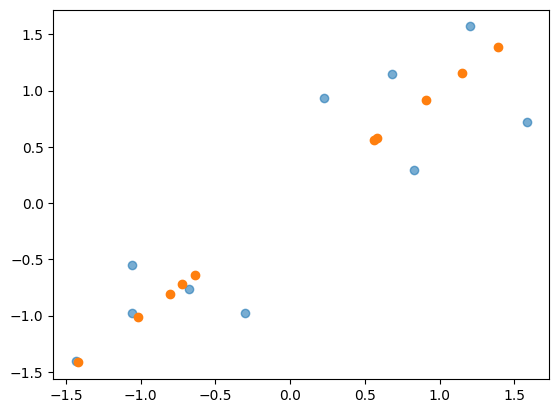

In [23]:
plt.scatter(scaled_data[:,0], scaled_data[:,1],alpha=0.6)
plt.scatter(pca_scaled_data[:,0],pca_scaled_data[:,0])

PCA for visualization

In [5]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

In [4]:
digits.data.shape, digits.data

((1797, 64),
 array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]))

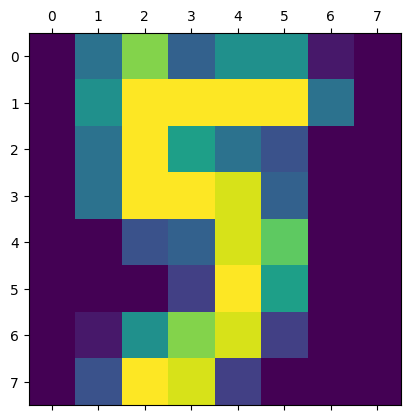

In [8]:
plt.matshow(digits.images[33])
plt.show()

In [9]:
digits.target[33]

5

In [12]:
from sklearn.decomposition import  PCA
pca = PCA(n_components=2)
new_digits = pca.fit_transform(digits.data)
new_digits.shape

(1797, 2)

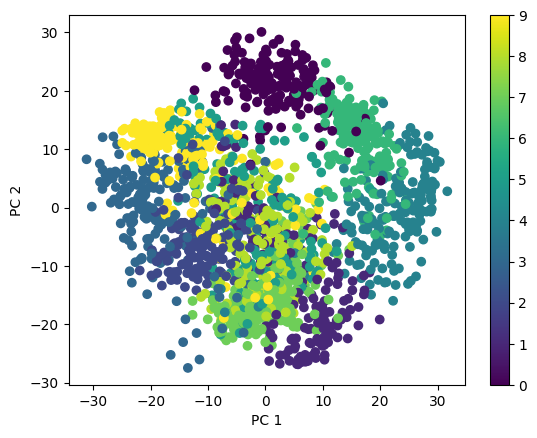

In [15]:
plt.scatter(new_digits[:,0],new_digits[:,1],c=digits.target)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar()

PCA for speedup models

In [16]:
from sklearn.datasets import load_digits
import numpy as np

In [17]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_data = sc.fit_transform(digits.data)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
new_data_pca= pca.fit_transform(new_data)

In [28]:
new_data_pca.shape

(1797, 10)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_data_pca,digits.target, test_size=0.2,random_state=42)

In [30]:
x_train.shape, x_test.shape

((1437, 10), (360, 10))

In [31]:
from sklearn.linear_model import LogisticRegression
import time
model= LogisticRegression(solver='lbfgs', max_iter=1000)
start = time.time()
model.fit(x_train,y_train)
end = time.time()

print((end-start)*1000)

38.53321075439453


In [32]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8944444444444445